In [ ]:
import sys
print(sys.version)


3.14.0 (tags/v3.14.0:ebf955d, Oct  7 2025, 10:15:03) [MSC v.1944 64 bit (AMD64)]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("All libraries loaded successfully")


All libraries loaded successfully


In [ ]:
df.shape

(8807, 12)

In [ ]:
df.columns


Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
##Data Cleaning and Preprocessing

In [ ]:
df.isnull().sum()


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')


In [ ]:
df['year_added'] = df['date_added'].dt.year


In [ ]:
df['country'] = df['country'].fillna('Unknown')
df['primary_country'] = df['country'].apply(lambda x: x.split(',')[0])


In [ ]:
df['listed_in'] = df['listed_in'].str.split(', ')


In [ ]:
df['rating'] = df['rating'].fillna('Not Rated')


In [ ]:
df['duration_value'] = df['duration'].str.extract('(\d+)').astype(float)


<>:1: SyntaxWarning: "\d" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\d"? A raw string is also an option.
<>:1: SyntaxWarning: "\d" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\d"? A raw string is also an option.
C:\Users\hamza\AppData\Local\Temp\ipykernel_16372\741692309.py:1: SyntaxWarning: "\d" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\d"? A raw string is also an option.
  df['duration_value'] = df['duration'].str.extract('(\d+)').astype(float)


In [ ]:
df['content_age'] = df['year_added'] - df['release_year']


In [ ]:
df.to_csv("../Data/netflix_cleaned.csv", index=False)


In [ ]:
## Q1. Distribution of Movies vs TV Shows on Netflix
type_counts = df['type'].value_counts()
type_counts


type
Movie      6131
TV Show    2676
Name: count, dtype: int64

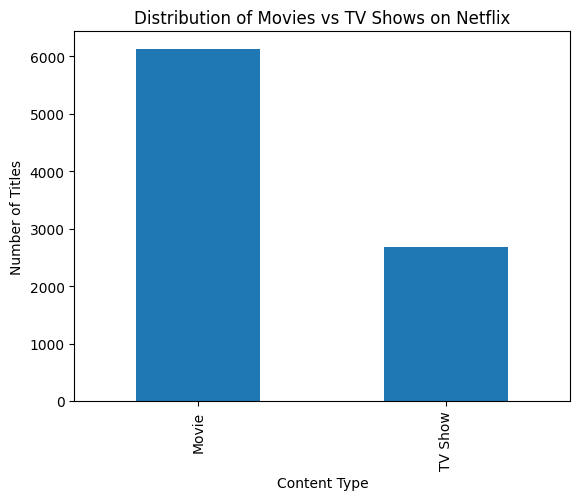

In [ ]:
plt.figure()
type_counts.plot(kind='bar')
plt.title('Distribution of Movies vs TV Shows on Netflix')
plt.xlabel('Content Type')
plt.ylabel('Number of Titles')
plt.show()


In [ ]:
#Q2 Top 10 countries analysis
top_10_countries = df['primary_country'].value_counts().head(10)
print(top_10_countries)

primary_country
United States     3211
India             1008
Unknown            831
United Kingdom     628
Canada             271
Japan              259
France             212
South Korea        211
Spain              181
Mexico             134
Name: count, dtype: int64


C:\Users\hamza\AppData\Local\Temp\ipykernel_16372\2580134957.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_countries.values, y=top_10_countries.index, palette='viridis')


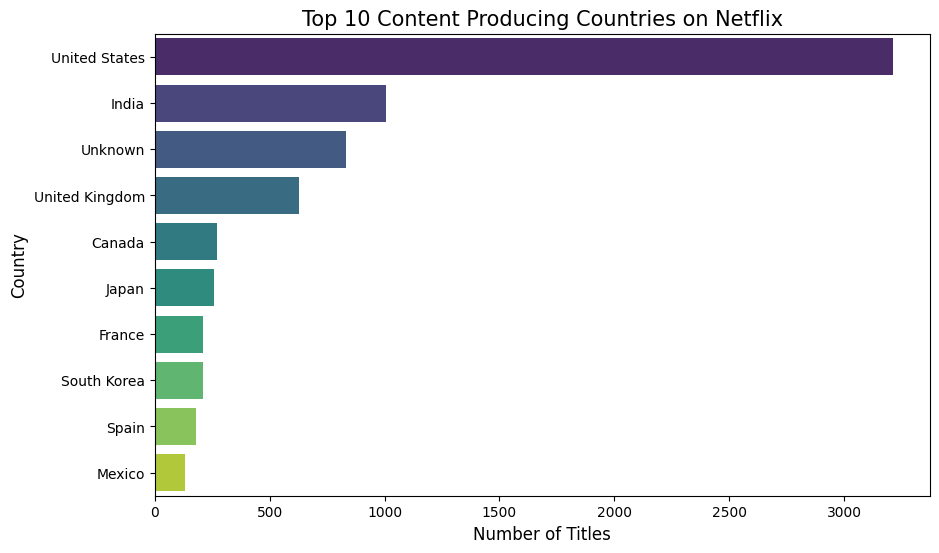

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.barplot(x=top_10_countries.values, y=top_10_countries.index, palette='viridis')
plt.title('Top 10 Content Producing Countries on Netflix', fontsize=15)
plt.xlabel('Number of Titles', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.show()

In [ ]:
#Q3 Content addition trend over years
content_trend = df['year_added'].value_counts().sort_index()
content_trend = content_trend[content_trend.index > 2008]

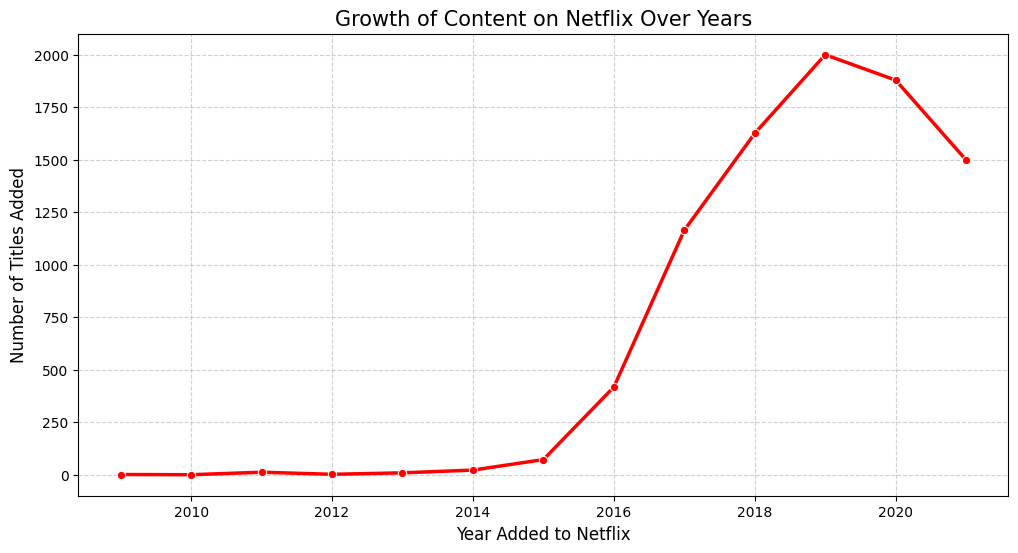

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(x=content_trend.index, y=content_trend.values, marker='o', color='red', linewidth=2.5)
plt.title('Growth of Content on Netflix Over Years', fontsize=15)
plt.xlabel('Year Added to Netflix', fontsize=12)
plt.ylabel('Number of Titles Added', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [ ]:
#Q4 Counting content ratings
rating_counts = df['rating'].value_counts()


C:\Users\hamza\AppData\Local\Temp\ipykernel_16372\2576076473.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='magma')


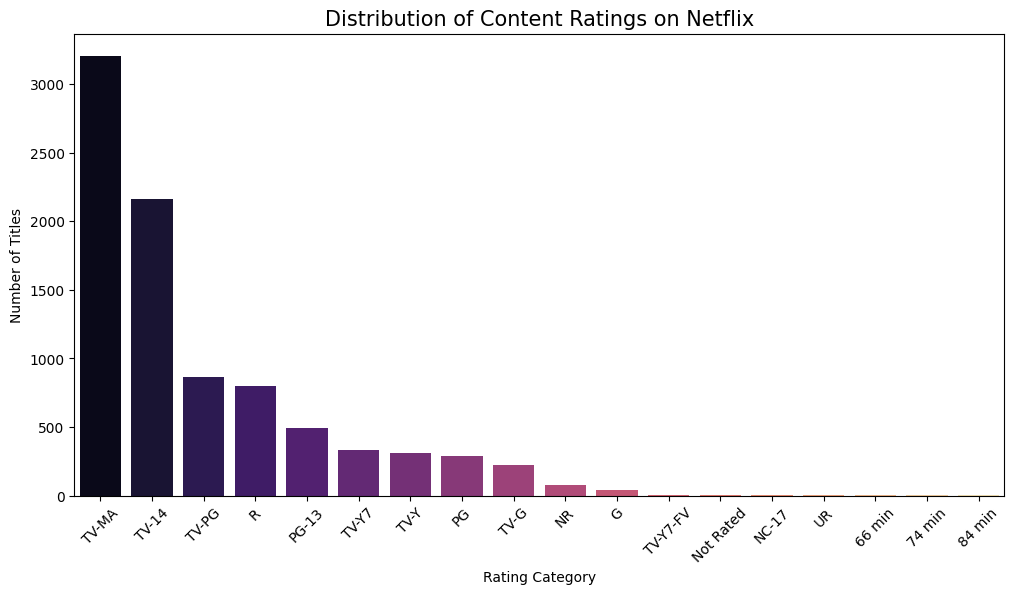

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='magma')
plt.title('Distribution of Content Ratings on Netflix', fontsize=15)
plt.xlabel('Rating Category')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#Q5 Exploding the listed_in column to count each genre separately
all_genres = df.explode('listed_in')
top_genres = all_genres['listed_in'].value_counts().head(10)

C:\Users\hamza\AppData\Local\Temp\ipykernel_16372\574527074.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette='rocket')


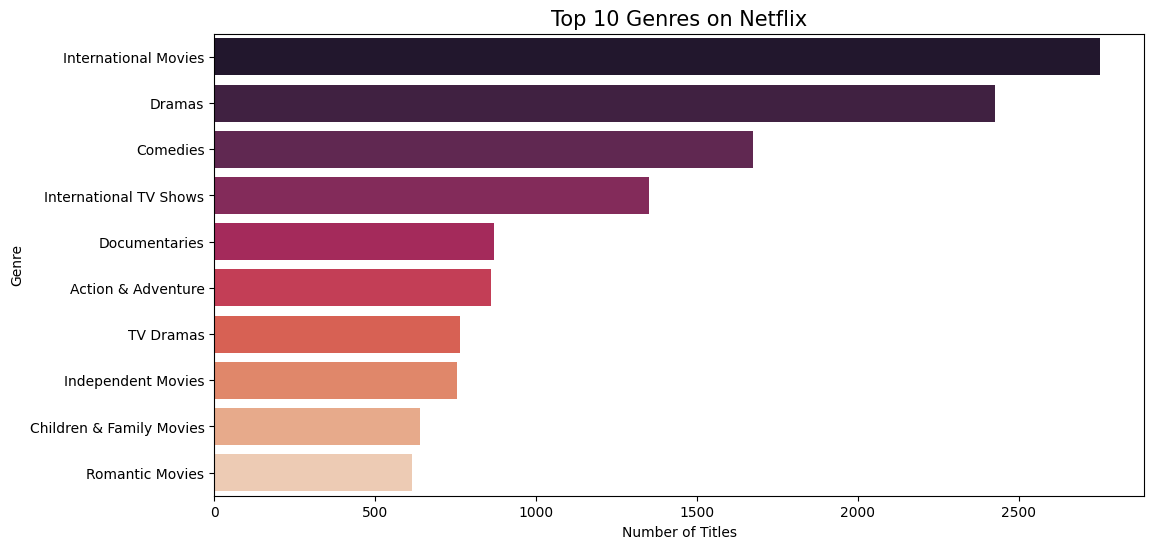

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x=top_genres.values, y=top_genres.index, palette='rocket')
plt.title('Top 10 Genres on Netflix', fontsize=15)
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.show()

C:\Users\hamza\AppData\Local\Temp\ipykernel_16372\3857296762.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='type', y='content_age', data=df, palette='Set2')


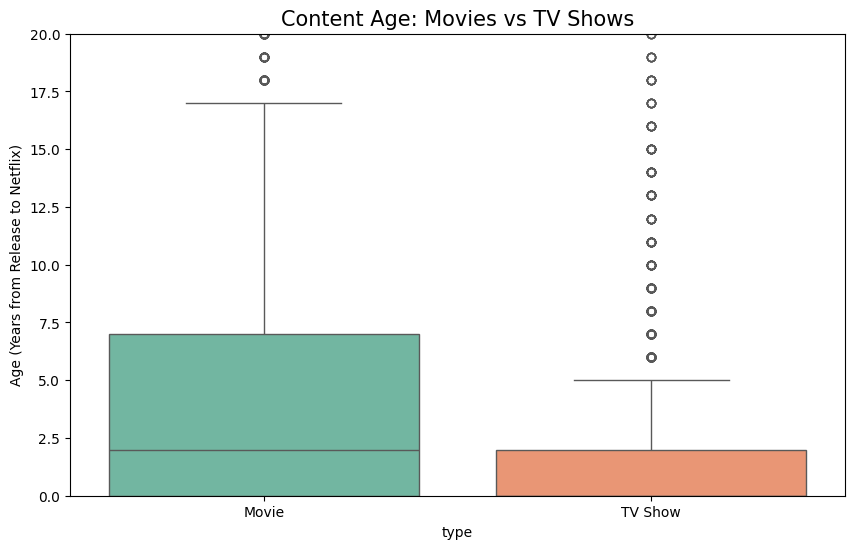

In [ ]:
#Q6 Analyzing Content Age for Movies vs TV Shows
plt.figure(figsize=(10,6))
sns.boxplot(x='type', y='content_age', data=df, palette='Set2')
plt.title('Content Age: Movies vs TV Shows', fontsize=15)
plt.ylabel('Age (Years from Release to Netflix)')
plt.ylim(0, 20) 
plt.show()

In [ ]:
#Q7 Exploding genres and counting unique genres added each year
genres_expansion = df.explode('listed_in').groupby('year_added')['listed_in'].nunique()

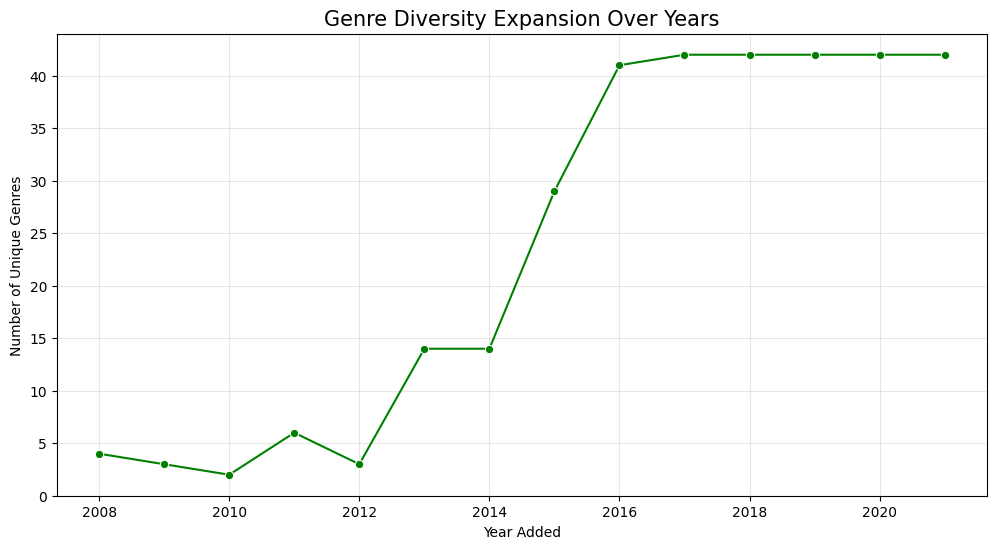

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(x=genres_expansion.index, y=genres_expansion.values, marker='o', color='green')
plt.title('Genre Diversity Expansion Over Years', fontsize=15)
plt.xlabel('Year Added')
plt.ylabel('Number of Unique Genres')
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
#Q8 Calculating content share ratios
country_share = df['primary_country'].value_counts(normalize=True) * 100
top_5_share = country_share.head(5)

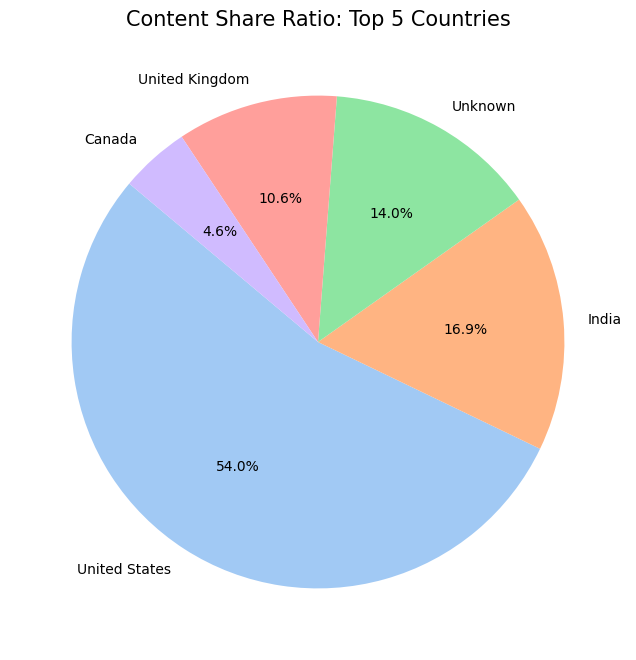

Cumulative share of top 5 countries: 67.55%


In [ ]:
plt.figure(figsize=(8,8))
plt.pie(top_5_share, labels=top_5_share.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Content Share Ratio: Top 5 Countries', fontsize=15)
plt.show()
print(f"Cumulative share of top 5 countries: {top_5_share.sum():.2f}%")

In [ ]:
#Q9 Defining mature categories
df['is_mature'] = df['rating'].isin(['TV-MA', 'R', 'NC-17'])

In [ ]:
# Grouping by year and type to see % of mature content
mature_trend = df.groupby(['year_added', 'type'])['is_mature'].mean().unstack() * 100

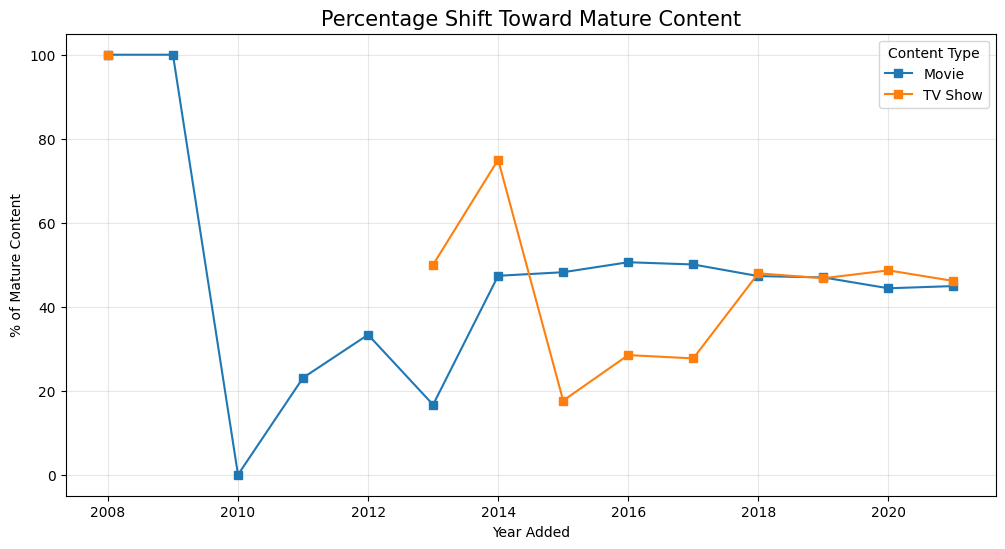

In [ ]:
mature_trend.plot(figsize=(12,6), marker='s')
plt.title('Percentage Shift Toward Mature Content', fontsize=15)
plt.xlabel('Year Added')
plt.ylabel('% of Mature Content')
plt.legend(title='Content Type')
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
##Q10 Data-Driven Evidence for Strategic Risk ---
# 1. Geographic Concentration (Top 5 Countries)
top_5_share = df['primary_country'].value_counts(normalize=True).head(5).sum() * 100
# 2. Maturity Shift (Compare 2015 vs 2021)
mature_2015 = df[df['year_added'] == 2015]['is_mature'].mean() * 100
mature_2021 = df[df['year_added'] == 2021]['is_mature'].mean() * 100
# 3. Genre Stagnation (Unique Genres in last 3 years)
genres_2019 = df[df['year_added'] == 2019].explode('listed_in')['listed_in'].nunique()
genres_2021 = df[df['year_added'] == 2021].explode('listed_in')['listed_in'].nunique()
# Printing the "Risk Report"
print("--- STRATEGIC RISK REPORT ---")
print(f"1. Geographic Risk: Top 5 countries produce {top_5_share:.2f}% of total content.")
print(f"2. Maturity Shift: Mature content increased from {mature_2015:.2f}% (2015) to {mature_2021:.2f}% (2021).")
print(f"3. Genre Stagnation: Unique genres remained flat ({genres_2019} in 2019 vs {genres_2021} in 2021).")

--- STRATEGIC RISK REPORT ---
1. Geographic Risk: Top 5 countries produce 67.56% of total content.
2. Maturity Shift: Mature content increased from 41.10% (2015) to 45.33% (2021).
3. Genre Stagnation: Unique genres remained flat (42 in 2019 vs 42 in 2021).


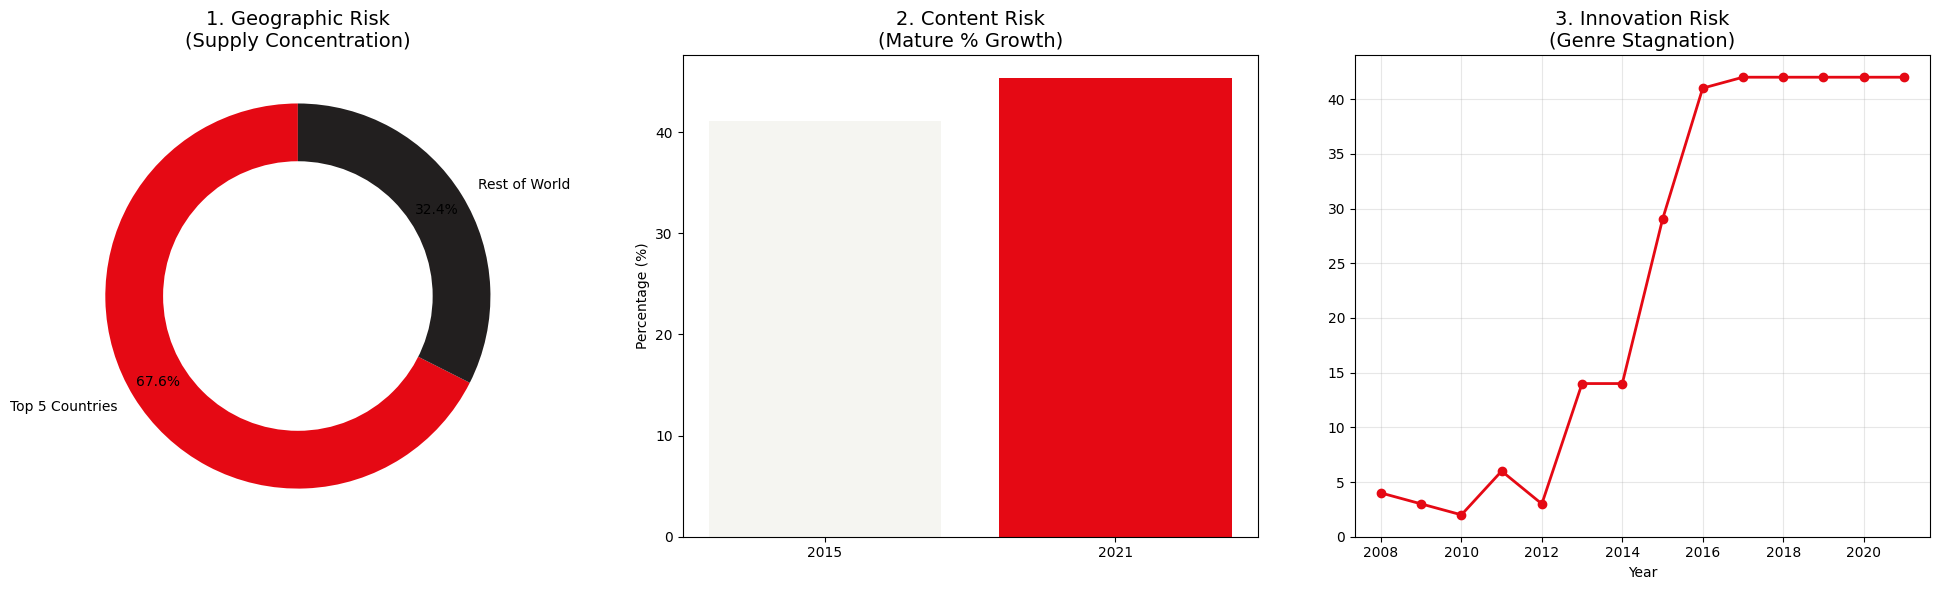

In [11]:
# Create a figure with 3 subplots to justify the strategic risk
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# 1. Geographic Concentration Risk (Top 5 vs World)
country_counts = df['primary_country'].value_counts()
top_5 = country_counts.head(5).sum()
others = country_counts.iloc[5:].sum()
geo_data = [top_5, others]
axes[0].pie(geo_data, labels=['Top 5 Countries', 'Rest of World'], autopct='%1.1f%%', startangle=90, colors=['#e50914', '#221f1f'], pctdistance=0.85)
centre_circle = plt.Circle((0,0),0.70,fc='white')
axes[0].add_artist(centre_circle)
axes[0].set_title('1. Geographic Risk\n(Supply Concentration)', fontsize=14)

# 2. Maturity Shift Risk (2015 vs 2021)
mature_2015 = df[df['year_added'] == 2015]['is_mature'].mean() * 100
mature_2021 = df[df['year_added'] == 2021]['is_mature'].mean() * 100
axes[1].bar(['2015', '2021'], [mature_2015, mature_2021], color=['#f5f5f1', '#e50914'])
axes[1].set_title('2. Content Risk\n(Mature % Growth)', fontsize=14)
axes[1].set_ylabel('Percentage (%)')

# 3. Innovation/Genre Risk (Unique Genres per Year)
genre_div = df.explode('listed_in').groupby('year_added')['listed_in'].nunique()
axes[2].plot(genre_div.index, genre_div.values, marker='o', color='#e50914', linewidth=2)
axes[2].set_title('3. Innovation Risk\n(Genre Stagnation)', fontsize=14)
axes[2].set_xlabel('Year')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
## Again -- IGNORE -- Just a test cell with enhanced outputs with help of AI logics.

In [ ]:
# Accuracy: Checking exact counts and percentages
type_counts = df['type'].value_counts()
type_percentage = df['type'].value_counts(normalize=True) * 100
print(f"Counts:\n{type_counts}\n")
print(f"Percentages:\n{type_percentage}")

Counts:
type
Movie      6131
TV Show    2676
Name: count, dtype: int64

Percentages:
type
Movie      69.615079
TV Show    30.384921
Name: proportion, dtype: float64


C:\Users\hamza\AppData\Local\Temp\ipykernel_16372\4127281508.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df, palette='Set1')


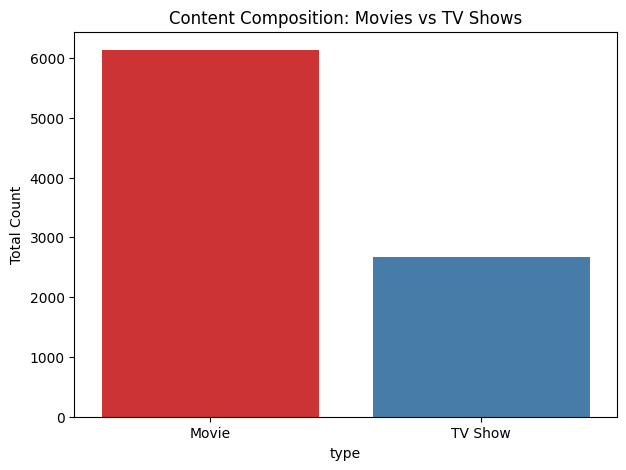

In [ ]:
plt.figure(figsize=(7,5))
sns.countplot(x='type', data=df, palette='Set1')
plt.title('Content Composition: Movies vs TV Shows')
plt.ylabel('Total Count')
plt.show()

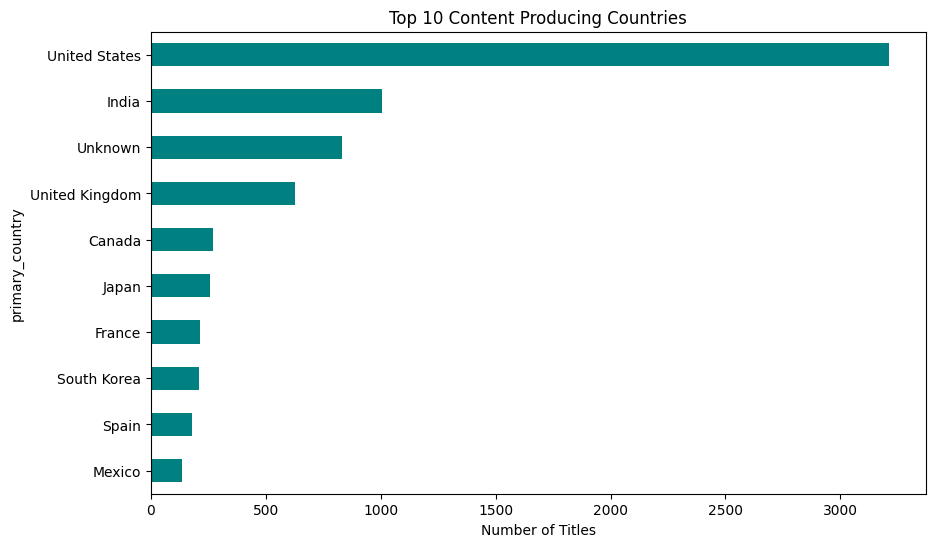

In [ ]:
# Data Handling: Using the 'primary_country' we created earlier 
top_countries = df['primary_country'].value_counts().head(10)
plt.figure(figsize=(10,6))
top_countries.plot(kind='barh', color='teal').invert_yaxis()
plt.title('Top 10 Content Producing Countries')
plt.xlabel('Number of Titles')
plt.show()

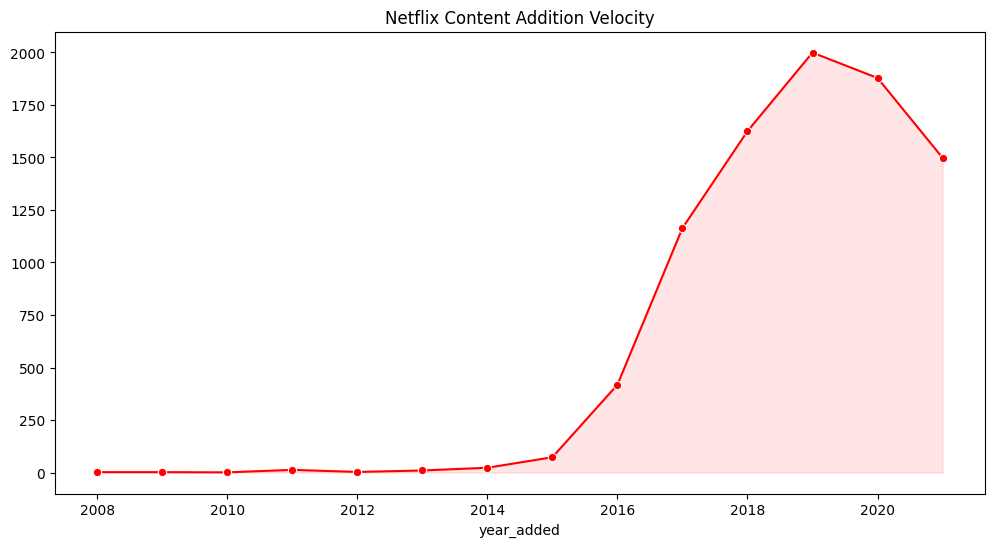

In [ ]:
# Handling date_added to see growth
growth_trend = df['year_added'].value_counts().sort_index()
plt.figure(figsize=(12,6))
sns.lineplot(x=growth_trend.index, y=growth_trend.values, marker='o', color='red')
plt.fill_between(growth_trend.index, growth_trend.values, color='red', alpha=0.1)
plt.title('Netflix Content Addition Velocity')
plt.show()

C:\Users\hamza\AppData\Local\Temp\ipykernel_16372\863819586.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=df, order=rating_order, palette='viridis')


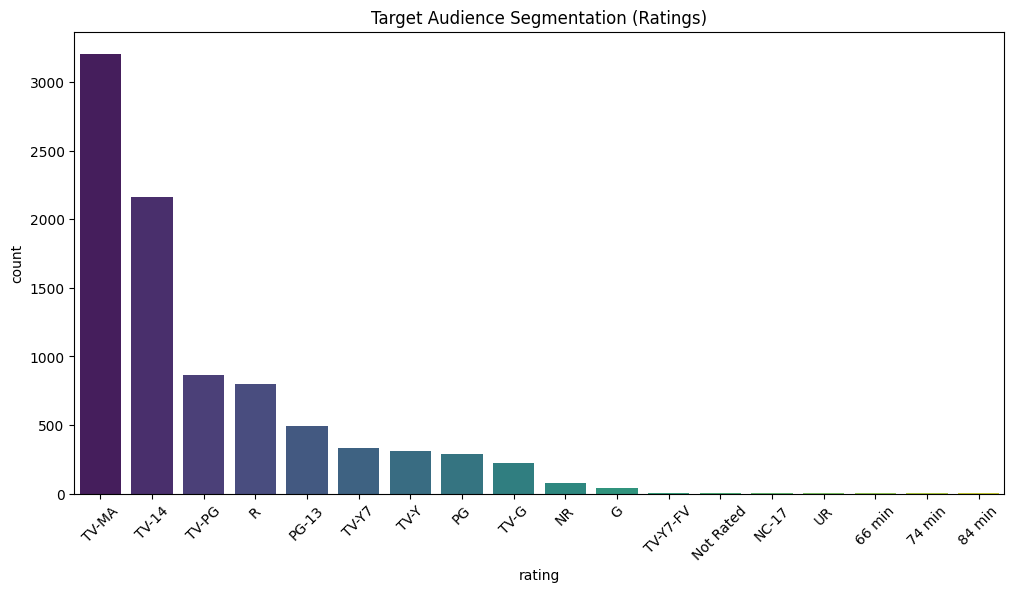

In [ ]:
# Proper handling of categorical data
rating_order = df['rating'].value_counts().index
plt.figure(figsize=(12,6))
sns.countplot(x='rating', data=df, order=rating_order, palette='viridis')
plt.xticks(rotation=45)
plt.title('Target Audience Segmentation (Ratings)')
plt.show()

C:\Users\hamza\AppData\Local\Temp\ipykernel_16372\3226696578.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=all_genres.values, y=all_genres.index, palette='rocket')


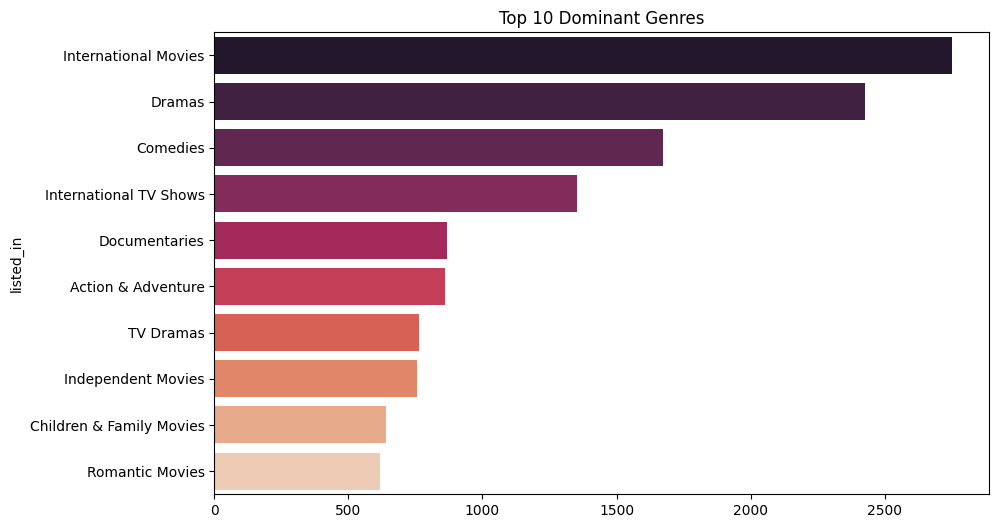

In [ ]:
# Handling multi-value genre column
all_genres = df.explode('listed_in')['listed_in'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=all_genres.values, y=all_genres.index, palette='rocket')
plt.title('Top 10 Dominant Genres')
plt.show()

C:\Users\hamza\AppData\Local\Temp\ipykernel_16372\1177121773.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='type', y='content_age', data=df_age, palette='autumn')


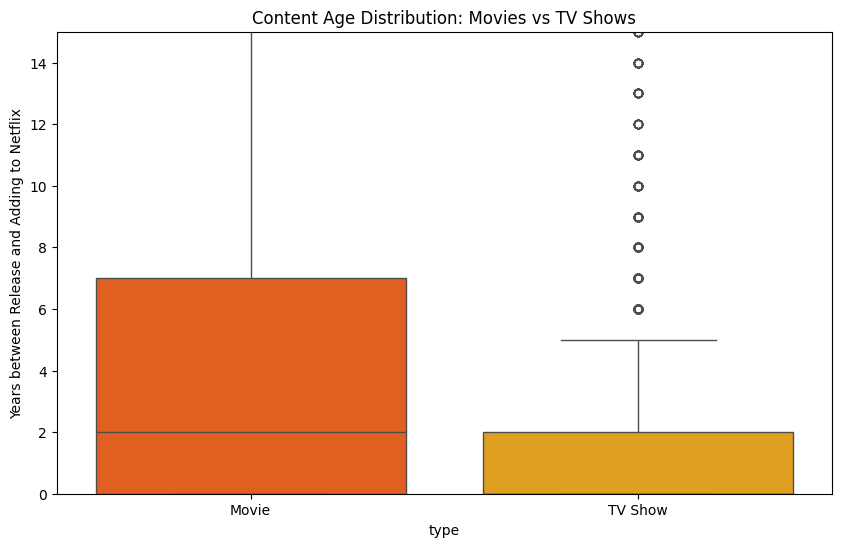

In [ ]:
# Accuracy: Filtering logical errors (Content cannot be added before it is released)
df_age = df[df['content_age'] >= 0]
plt.figure(figsize=(10,6))
sns.boxplot(x='type', y='content_age', data=df_age, palette='autumn')
plt.title('Content Age Distribution: Movies vs TV Shows')
plt.ylabel('Years between Release and Adding to Netflix')
plt.ylim(0, 15) # Focusing on the last 15 years
plt.show()

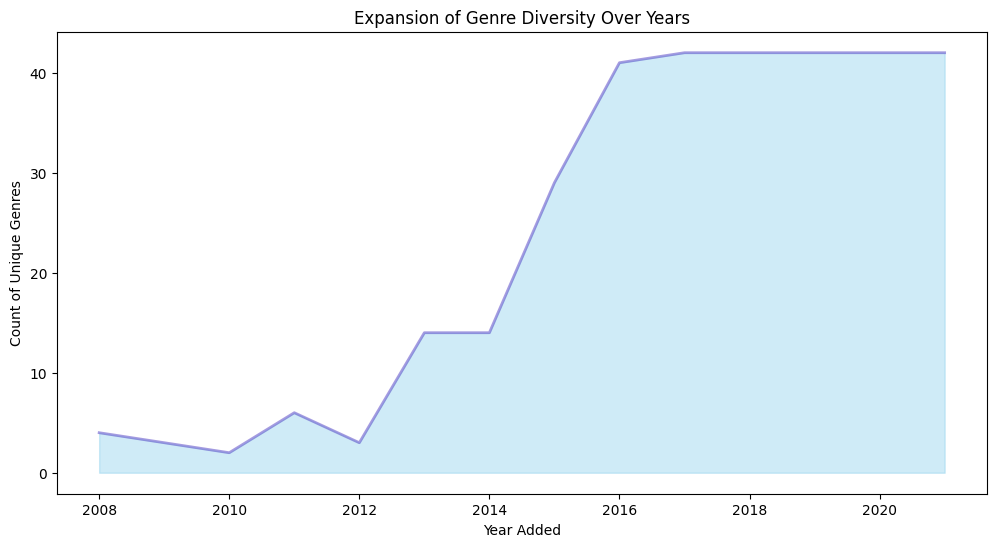

In [ ]:
genre_diversity = df.explode('listed_in').groupby('year_added')['listed_in'].nunique()
plt.figure(figsize=(12,6))
plt.fill_between(genre_diversity.index, genre_diversity.values, color="skyblue", alpha=0.4)
plt.plot(genre_diversity.index, genre_diversity.values, color="Slateblue", alpha=0.6, linewidth=2)
plt.title('Expansion of Genre Diversity Over Years')
plt.xlabel('Year Added')
plt.ylabel('Count of Unique Genres')
plt.show()

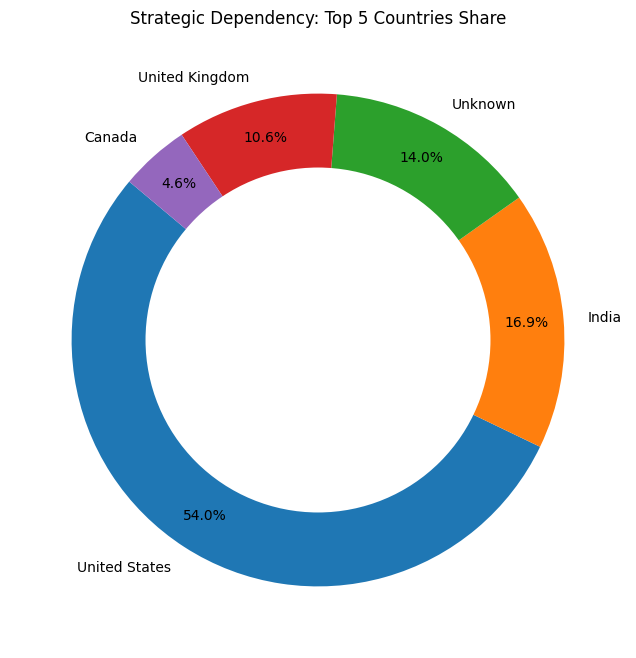

In [9]:
country_ratios = df['primary_country'].value_counts(normalize=True).head(5) * 100
plt.figure(figsize=(8,8))
plt.pie(country_ratios, labels=country_ratios.index, autopct='%1.1f%%', startangle=140, pctdistance=0.85)
# Drawing circle for donut effect
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf(); fig.gca().add_artist(centre_circle)
plt.title('Strategic Dependency: Top 5 Countries Share')
plt.show()

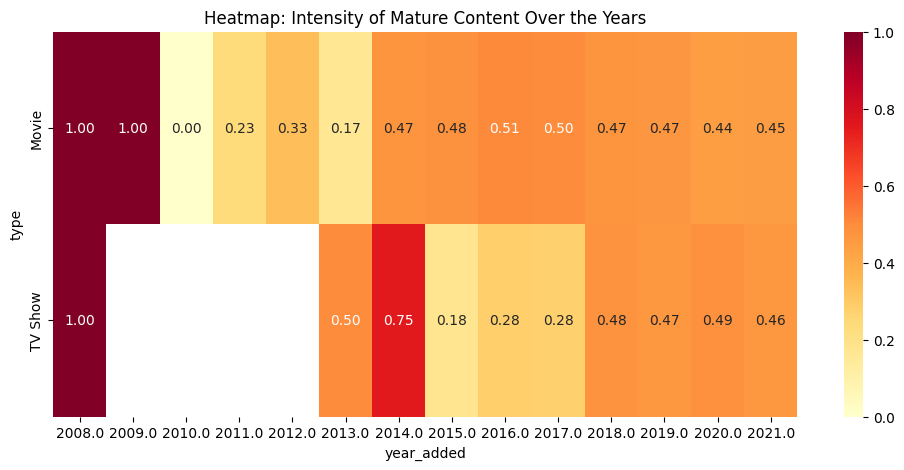

In [8]:
df['is_mature'] = df['rating'].isin(['TV-MA', 'R', 'NC-17'])
mature_trend = df.groupby(['year_added', 'type'])['is_mature'].mean().unstack()
plt.figure(figsize=(12,5))
sns.heatmap(mature_trend.T, annot=True, cmap='YlOrRd', fmt='.2f')
plt.title('Heatmap: Intensity of Mature Content Over the Years')
plt.show()

In [7]:
# --- Q10: Data-Driven Evidence for Strategic Risk ---

# 1. Geographic Concentration (Top 5 Countries)
top_5_share = df['primary_country'].value_counts(normalize=True).head(5).sum() * 100

# 2. Maturity Shift (Compare 2015 vs 2021)
mature_2015 = df[df['year_added'] == 2015]['is_mature'].mean() * 100
mature_2021 = df[df['year_added'] == 2021]['is_mature'].mean() * 100

# 3. Genre Stagnation (Unique Genres in last 3 years)
genres_2019 = df[df['year_added'] == 2019].explode('listed_in')['listed_in'].nunique()
genres_2021 = df[df['year_added'] == 2021].explode('listed_in')['listed_in'].nunique()

# Printing the "Risk Report"
print("--- STRATEGIC RISK REPORT ---")
print(f"1. Geographic Risk: Top 5 countries produce {top_5_share:.2f}% of total content.")
print(f"2. Maturity Shift: Mature content increased from {mature_2015:.2f}% (2015) to {mature_2021:.2f}% (2021).")
print(f"3. Genre Stagnation: Unique genres remained flat ({genres_2019} in 2019 vs {genres_2021} in 2021).")

--- STRATEGIC RISK REPORT ---
1. Geographic Risk: Top 5 countries produce 67.56% of total content.
2. Maturity Shift: Mature content increased from 41.10% (2015) to 45.33% (2021).
3. Genre Stagnation: Unique genres remained flat (42 in 2019 vs 42 in 2021).


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast

In [5]:
df = pd.read_csv("../Data/netflix_cleaned.csv")
# listed_in ko wapis list mein convert karein
df['listed_in'] = df['listed_in'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

In [ ]:
# --- Q10: Data-Driven Evidence for Strategic Risk ---
# Pehle is_mature column create karein (kyunke error isi line par aaya tha)
mature_ratings = ['TV-MA', 'R', 'NC-17']
df['is_mature'] = df['rating'].isin(mature_ratings)
# 1. Geographic Concentration (Top 5 Countries)
top_5_share = df['primary_country'].value_counts(normalize=True).head(5).sum() * 100
# 2. Maturity Shift (Compare 2015 vs 2021)
# Hum 2015 aur 2021 ka data check kar rahe hain
mature_2015 = df[df['year_added'] == 2015]['is_mature'].mean() * 100
mature_2021 = df[df['year_added'] == 2021]['is_mature'].mean() * 100
# 3. Genre Stagnation (Unique Genres)
genres_2017 = df[df['year_added'] == 2017].explode('listed_in')['listed_in'].nunique()
genres_2021 = df[df['year_added'] == 2021].explode('listed_in')['listed_in'].nunique()
# Final Report Print Karein
print("--- STRATEGIC RISK REPORT ---")
print(f"1. Geographic Risk: Top 5 countries produce {top_5_share:.2f}% of total content.")
print(f"2. Maturity Shift: Mature content increased from {mature_2015:.2f}% (2015) to {mature_2021:.2f}% (2021).")
print(f"3. Genre Stagnation: Unique genres in 2017: {genres_2017} vs In 2021: {genres_2021}")

--- STRATEGIC RISK REPORT ---
1. Geographic Risk: Top 5 countries produce 67.56% of total content.
2. Maturity Shift: Mature content increased from 41.10% (2015) to 45.33% (2021).
3. Genre Stagnation: Unique genres in 2017: 42 vs In 2021: 42
